In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
#getting data
ds=pd.read_csv('insurance.csv')

In [ ]:
ds

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
dataset=ds.drop(columns='region')

In [ ]:
#creating dataset
dataset

,age,sex,bmi,children,smoker,expenses
0,19,female,27.9,0,yes,16884.92
1,18,male,33.8,1,no,1725.55
2,28,male,33.0,3,no,4449.46
3,33,male,22.7,0,no,21984.47
4,32,male,28.9,0,no,3866.86
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,10600.55
1334,18,female,31.9,0,no,2205.98
1335,18,female,36.9,0,no,1629.83
1336,21,female,25.8,0,no,2007.95


In [ ]:
#handling categorical data
dataset['sex']=dataset['sex'].astype('category')
dataset['sex']=dataset['sex'].cat.codes

In [ ]:
dataset['smoker']=dataset['smoker'].astype('category')
dataset['smoker']=dataset['smoker'].cat.codes

In [ ]:
dataset

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [ ]:
#checking for missing values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
expenses    0
dtype: int64

In [ ]:
dataset

,age,sex,bmi,children,smoker,expenses
0,19,0,27.9,0,1,16884.92
1,18,1,33.8,1,0,1725.55
2,28,1,33.0,3,0,4449.46
3,33,1,22.7,0,0,21984.47
4,32,1,28.9,0,0,3866.86
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,10600.55
1334,18,0,31.9,0,0,2205.98
1335,18,0,36.9,0,0,1629.83
1336,21,0,25.8,0,0,2007.95


In [ ]:
#creating independent and dependent variable
#x=dataset[['age','sex','bmi','children','smoker']]
#or
x=dataset.drop(columns='expenses')

In [ ]:
x

,age,sex,bmi,children,smoker
0,19,0,27.9,0,1
1,18,1,33.8,1,0
2,28,1,33.0,3,0
3,33,1,22.7,0,0
4,32,1,28.9,0,0
...,...,...,...,...,...
1333,50,1,31.0,3,0
1334,18,0,31.9,0,0
1335,18,0,36.9,0,0
1336,21,0,25.8,0,0


In [ ]:
y=dataset['expenses']

In [ ]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#linear regression

linearR=LinearRegression()

In [ ]:
linearR.fit(x_train,y_train)

LinearRegression()

In [ ]:
c=linearR.intercept_
c

-11902.332161437842

In [ ]:
m=linearR.coef_
m

array([  254.92559303,   -23.68498393,   320.74742029,   431.08393696,
       23587.76518807])

In [ ]:
y_pred_train=linearR.predict(x_train)
y_pred_train

array([33755.81776439,  3696.35478705, 30182.31986476, ...,
        6321.76682499,  4304.10254239,  2875.12362078])

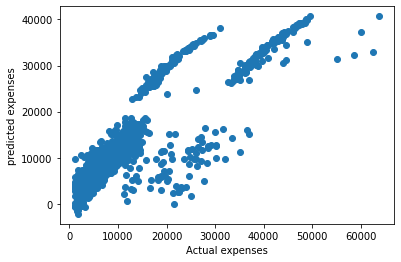

In [ ]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual expenses")
plt.ylabel("predicted expenses")
plt.show()

In [ ]:
r2_score(y_train,y_pred_train)

0.7361493820472409

In [ ]:
y_pred_test=linearR.predict(x_test)

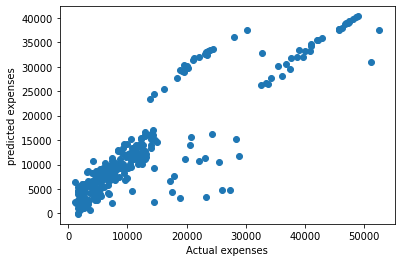

In [ ]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual expenses")
plt.ylabel("predicted expenses")
plt.show()

In [ ]:
r2_score(y_test,y_pred_test) #>0.5 

0.7978966946106113

In [ ]:
#good model